importing essential libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [132]:
df= pd.read_csv("IPL Matches 2008-2020.csv")
df.head()
df.isnull().sum()
df.describe()
#df.info()




,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [60]:
df.date= pd.to_datetime(df.date)
df.dtypes
df.shape


(816, 17)

Most succesfull teams: Mumbai Indians is the most succesfull team in IPL with total od 120 wins followed by chennai super kings with 106 wins
Number of matches played: 816 



<AxesSubplot:>

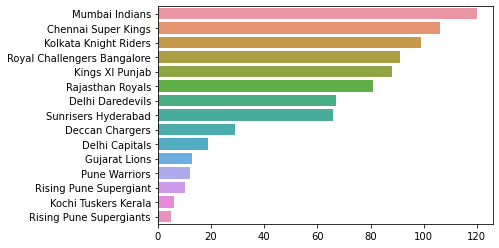

In [59]:
df.shape
x= df.winner.value_counts()
sns.barplot(x.values,x.index)

In [61]:
df.winner.value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

Most valuable players:
AB de Villiers is the player with most man of the match awards with a total of 23 followed by Chris Gayle and Rohit Sharma with 22 and 18 awards respectively


<AxesSubplot:>

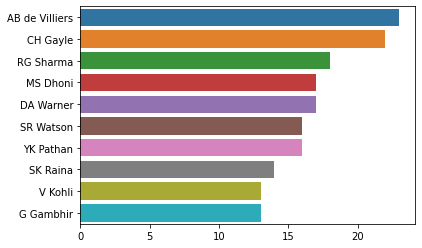

In [71]:
df.head()
df.player_of_match.value_counts().head(10)
z= df.player_of_match.value_counts().head(10)
sns.barplot(z.values,z.index)

In [72]:
df.player_of_match.value_counts().head(10)

AB de Villiers    23
CH Gayle          22
RG Sharma         18
MS Dhoni          17
DA Warner         17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

Venues with most number of matches held:Eden gardens has held the most number of matches with a total of 77 

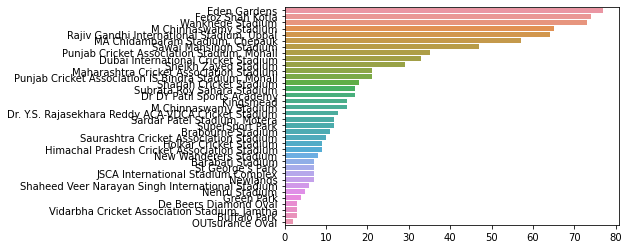

In [78]:
df.head()
z=df.venue.value_counts()
ax= sns.barplot(z.values,z.index)


Mumbai has hosted the most number of matches followed by kolkata and delhi

In [83]:
df.city.value_counts().head(5)


Mumbai       101
Kolkata       77
Delhi         74
Bangalore     65
Hyderabad     64
Name: city, dtype: int64

Most preferred toss decision

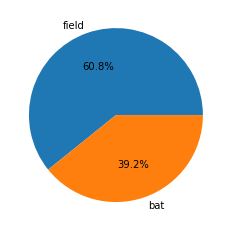

In [93]:
%matplotlib inline
x= df.toss_decision.value_counts()
labels=x.index
y=x.values
plt.pie(y,labels= labels,autopct= "%1.1f%%")
plt.show()


Impact on results after winning the toss and choosing to bat first: 
52% of the matches have been lost after batting first and 45% of matches have been won

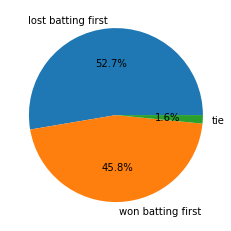

In [113]:
x= df[df.toss_decision=="bat"]
z= x.result.value_counts()
labels= ["lost batting first","won batting first","tie"]
y= z.values
plt.pie(y,labels= labels,autopct= "%1.1f%%")
plt.show()




Impact on results after winning the toss and choosing to field first: 
54.2% of the matches have been won after fielding first and 44.2% of matches have been lost

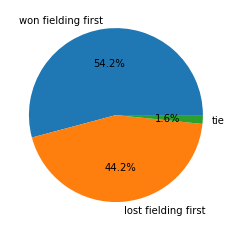

In [117]:
x= df[df.toss_decision=="field"]
z= x.result.value_counts()
z
labels= ["won fielding first","lost fielding first","tie"]
y= z.values
plt.pie(y,labels= labels,autopct= "%1.1f%%")
plt.show()

In [138]:
df.loc[df.result_margin.max()]

id                                          419137
city                                       Chennai
date                                    2010-04-03
player_of_match                            M Vijay
venue              MA Chidambaram Stadium, Chepauk
neutral_venue                                    0
team1                          Chennai Super Kings
team2                             Rajasthan Royals
toss_winner                    Chennai Super Kings
toss_decision                                  bat
winner                         Chennai Super Kings
result                                        runs
result_margin                                   23
eliminator                                       N
method                                         NaN
umpire1                                RE Koertzen
umpire2                                  RB Tiffin
Name: 146, dtype: object

Out of 816 matches 418 were won after winning the toss 

In [151]:
z= df[df.toss_winner==df.winner]
z.shape


(418, 17)

Mumbai Indians is the team that has won by biggest margin(146 runs) against Delhi Daredevils in 2017 

In [179]:
x= df.result_margin.max()
z= df[df.result_margin== x]
z

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan


Distribution of matches won after batting second by wickets: 14 matches were won by 10 wickets (without losing single wicket) while 3 matches were won by close margin of single wicket

In [245]:
x= df[df.result== "wickets"]
x.result_margin.value_counts()

6.0     88
7.0     84
5.0     79
8.0     62
4.0     42
9.0     39
3.0     18
10.0    14
2.0      6
1.0      3
Name: result_margin, dtype: int64

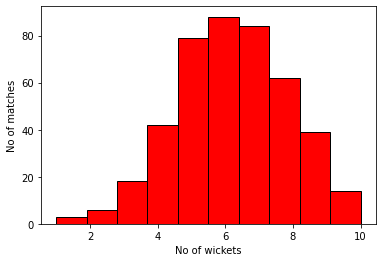

In [242]:
x= df[df.result== "wickets"]
plt.hist(x.result_margin,bins= 10,edgecolor="black",color= "red")
plt.xlabel("No of wickets")
plt.ylabel("No of matches")
plt.show()




Mumbai Indians has won most number of IPL trophies with a total of 5 followed by Chennai super kings(3) and Kolkata knight riderd(2)

In [264]:
df.dtypes
df.date= pd.to_datetime(df.date)
df["year"]= df.date.dt.year
x= df.groupby("year").tail(1)
x.winner.value_counts()


Mumbai Indians           5
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Deccan Chargers          1
Name: winner, dtype: int64

<BarContainer object of 6 artists>

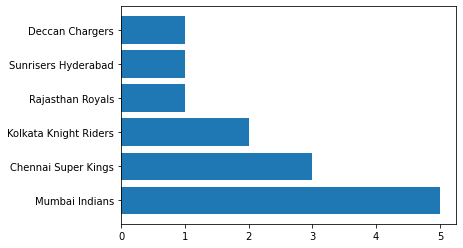

In [266]:
z= x.winner.value_counts()
plt.barh(z.index,z.values)

Conclusions:
-Mumbai Inidans is the most succesful team in IPL with most number of trophies and also in terms of winning matches followed by chennai super kings
-AB de villiers is the most valuable player in terms of winning most number of man of the matches followed by Chris Gayle
-Mumbai has hosted most number of IPL matches while Eden gardens is the venue that held most matches
-Fielding first after winning the toss has slight edge over batting first 
-Most teams prefer to field first after winning the toss

